In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [560]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [561]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [562]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [563]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [564]:
df_train.describe(percentiles=[0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [565]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [566]:
df_train.shape

(1460, 81)

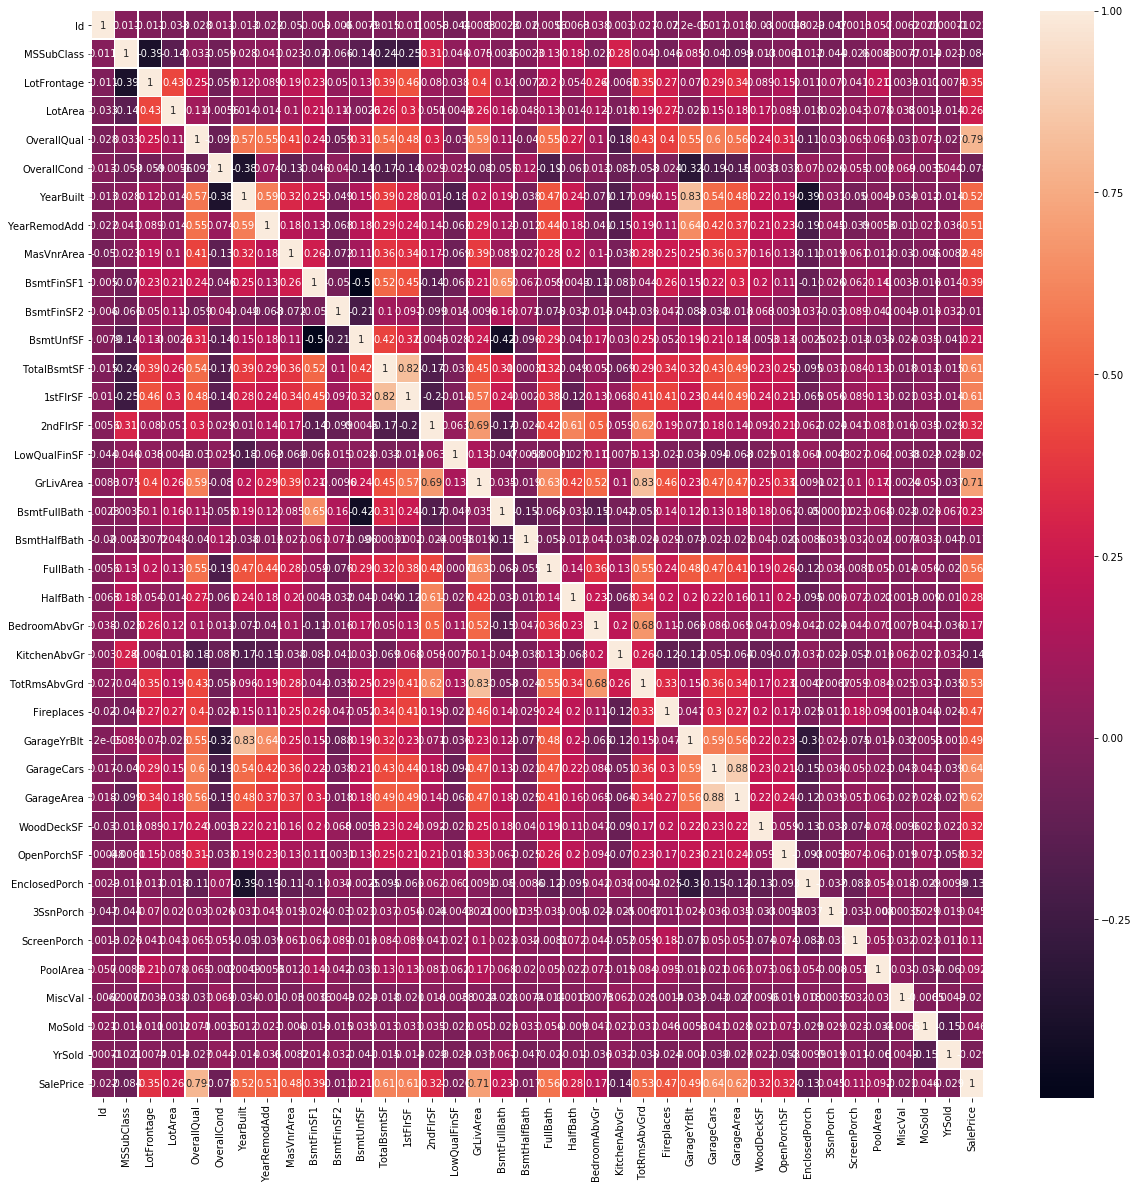

In [567]:
corr=df_train.corr()
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=0.5,ax=ax)

In [568]:
df_train.drop(columns=['PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)

In [569]:
df_train.shape

(1460, 77)

In [570]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
                ... 
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond   

In [571]:
df_train.isnull().all(axis=1).sum()

0

In [572]:
len(df_train[df_train.isnull().sum(axis=1) > 4].index)

111

In [573]:
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(),axis=0,inplace=True)

In [574]:
df_train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [575]:
df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0],axis=0,inplace=True)

In [576]:
df_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [577]:
df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0],axis=0,inplace=True)

In [578]:
df_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [579]:
df_train['GarageType'].fillna(df_train['GarageType'].mode()[0],axis=0,inplace=True)

In [580]:
df_train['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
          ..
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3
1921.0     3
1924.0     3
1910.0     3
1952.0     3
1932.0     3
2010.0     3
1923.0     3
1937.0     2
1934.0     2
1918.0     2
1947.0     2
1929.0     2
1914.0     2
1915.0     2
1942.0     2
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [581]:
df_train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [582]:
df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0],axis=0,inplace=True)

In [583]:
df_train['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [584]:
df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0],axis=0,inplace=True)

In [585]:
df_train['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [586]:
df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0],axis=0,inplace=True)

In [587]:
df_train['MasVnrArea'].value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64

In [588]:
df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0],axis=0,inplace=True)

In [589]:
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0],axis=0,inplace=True)

In [590]:
len(df_train.index)

1460

In [591]:
df_train.columns[df_train.isnull().any(axis=0)]

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageYrBlt'],
      dtype='object')

In [592]:
df_train['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [593]:
df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0],axis=0,inplace=True)

In [594]:
df_train['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [595]:
df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0],axis=0,inplace=True)

In [596]:
df_train['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [597]:
df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0],axis=0,inplace=True)

In [598]:
df_train['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [599]:
df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0],axis=0,inplace=True)

In [600]:
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [601]:
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0],axis=0,inplace=True)

In [602]:
df_train.isnull().any(axis=1).sum()

81

In [603]:
df_train.columns[df_train.isnull().any()]

Index(['GarageYrBlt'], dtype='object')

In [604]:
df_train.drop(columns=['GarageYrBlt'],axis=1,inplace=True)

In [605]:
df_train.shape

(1460, 76)

In [606]:
df_test=pd.read_csv("test.csv")

In [607]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [608]:
df_test.describe(percentiles=[0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
99%,2904.420000,190.000000,130.690000,26210.340000,9.000000,9.000000,2008.000000,2009.000000,736.280000,1682.860000,...,1040.430000,492.520000,276.840000,264.420000,0.000000,255.000000,0.000000,1326.000000,12.000000,2010.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [609]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [610]:
df_test.drop(columns=['PoolQC','Fence','MiscFeature','Alley','GarageYrBlt'],axis=1,inplace=True)

In [611]:
df_test.shape

(1459, 75)

In [612]:
df_test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [613]:
df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0],axis=0,inplace=True)

In [614]:
df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(),axis=0,inplace=True)

In [615]:
df_test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [616]:
df_test['Utilities'].fillna(df_test['Utilities'].mode()[0],axis=0,inplace=True)

In [617]:
df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0],axis=0,inplace=True)

In [618]:
df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0],axis=0,inplace=True)

In [619]:
df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0],axis=0,inplace=True)

In [620]:
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0],axis=0,inplace=True)

In [621]:
df_test['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [622]:
df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0],axis=0,inplace=True)

In [623]:
df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0],axis=0,inplace=True)

In [624]:
df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0],axis=0,inplace=True)

In [625]:
df_test['KitchenQual'].fillna(df_test['BsmtHalfBath'].mode()[0],axis=0,inplace=True)

In [626]:
df_test['Functional'].fillna(df_test['Functional'].mode()[0],axis=0,inplace=True)

In [627]:
df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0],axis=0,inplace=True)
df_test['GarageType'].fillna(df_test['GarageType'].mode()[0],axis=0,inplace=True)
df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0],axis=0,inplace=True)
df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0],axis=0,inplace=True)

In [628]:
df_test['FireplaceQu'].fillna(df_test['GarageCond'].mode()[0],axis=0,inplace=True)

In [629]:
df_test['GarageCars'].fillna(df_test['GarageCars'].mode()[0],axis=0,inplace=True)
df_test['GarageArea'].fillna(df_test['GarageArea'].mode()[0],axis=0,inplace=True)

In [630]:
df_test['SaleType'].fillna(df_test['GarageArea'].mode()[0],axis=0,inplace=True)

In [631]:
df_test.isnull().any(axis=0).sum()

8

In [632]:
df_test.columns[df_test.isnull().any()]

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'],
      dtype='object')

In [633]:
df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0],axis=0,inplace=True)

In [634]:
df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0],axis=0,inplace=True)

In [635]:
df_test['BsmtFinType1'].isnull().sum()

42

In [636]:
df_test['BsmtFinType1'].value_counts()

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [637]:
df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0],axis=0,inplace=True)

In [638]:
df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mode()[0],axis=0,inplace=True)

In [639]:
df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0],axis=0,inplace=True)

In [640]:
df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mode()[0],axis=0,inplace=True)

In [641]:
df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mode()[0],axis=0,inplace=True)

In [642]:
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mode()[0],axis=0,inplace=True)

In [643]:
df_test.shape

(1459, 75)

In [644]:
df_train.shape

(1460, 76)

In [645]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [646]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [647]:
df_final=pd.concat([df_train,df_test],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [648]:
df_final.shape

(2919, 76)

In [649]:
#These are the columns which have categorical variables
df_final.select_dtypes(include=object).columns

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [650]:
df_train['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [651]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      29

In [652]:
df_final.to_csv("Final.csv")

In [653]:
df_final=pd.get_dummies(df_final,columns=df_final.select_dtypes(include=object).columns,drop_first=True)

In [654]:
df_final.shape

(2919, 239)

In [655]:
df_final.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,1,1,0


In [656]:
df_final.to_csv('Final_with_dummy.csv')

In [657]:
#Let us check if there are any duplicate columns
df_final.columns.duplicated().sum()

0

In [658]:
df_Train=df_final.iloc[:1460,:]
df_Test=df_final.iloc[1460:,:]
print(df_Train.shape)
print(df_Test.shape)


(1460, 239)
(1459, 239)


In [659]:
df_Test.drop(columns=['SalePrice'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [660]:
X_train=df_Train.drop(columns=['SalePrice']).values

In [661]:
y_train=df_Train['SalePrice'].values

In [662]:
X_test=df_Test.values

In [663]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1460, 238)
(1460,)
(1459, 238)


In [664]:
X_train

array([[8.560e+02, 8.540e+02, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.262e+03, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [9.200e+02, 8.660e+02, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.188e+03, 1.152e+03, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.078e+03, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.256e+03, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [665]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [666]:
X_train

array([[-0.79343379,  1.16185159, -0.11633929, ...,  0.39029263,
         0.06423821, -0.02618016],
       [ 0.25714043, -0.79516323, -0.11633929, ...,  0.39029263,
         0.06423821, -0.02618016],
       [-0.62782603,  1.18935062, -0.11633929, ...,  0.39029263,
         0.06423821, -0.02618016],
       ...,
       [ 0.06565646,  1.84474434, -0.11633929, ...,  0.39029263,
         0.06423821, -0.02618016],
       [-0.21898188, -0.79516323, -0.11633929, ...,  0.39029263,
         0.06423821, -0.02618016],
       [ 0.2416147 , -0.79516323, -0.11633929, ...,  0.39029263,
         0.06423821, -0.02618016]])

In [667]:
from sklearn.linear_model import LinearRegression

In [668]:
linreg=LinearRegression()

In [669]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [671]:
from sklearn.model_selection import KFold,cross_val_score
folds=KFold(n_splits=5,shuffle=True,random_state=10)
r2_scores=cross_val_score(estimator=linreg,X=X_train,y=y_train,cv=folds,scoring='r2')
print(r2_scores)

[-5.90600231e+23 -2.31797380e+22  8.76772225e-01  4.32465071e-01
  7.97855698e-01]


In [672]:
print(r2_scores.mean()*100)

-1.2275599384745875e+25


In [675]:
y_pred=linreg.predict(X_test)

In [676]:
y_pred

array([113483.12943536, 162472.34687584, 190371.19030382, ...,
       182915.96069518, 106597.00101262, 222516.36956845])

In [692]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
new_df=pd.concat([sub_df['Id'],pred],axis=1,ignore_index=True)

In [696]:
new_df.columns=['Id','SalePrice']
new_df.to_csv("Prediction.csv",index=False)

In [697]:
new_df.head(20)

,Id,SalePrice
0,1461,113483.129435
1,1462,162472.346876
2,1463,190371.190304
3,1464,197238.948651
4,1465,202682.528299
5,1466,173218.008926
6,1467,180896.429474
7,1468,160051.330202
8,1469,209650.312463
9,1470,115662.886274


In [698]:
new_df.shape

(1459, 2)